# Notebook import

In [1]:
from sklearn.datasets import load_boston

from sklearn.linear_model import LinearRegression

from sklearn.model_selection import train_test_split

import matplotlib.pyplot as plt

import seaborn as sns

import numpy as np

import pandas as pd

import statsmodels.api as sm

from statsmodels.stats.outliers_influence import variance_inflation_factor

%matplotlib inline

# Garther Data

In [2]:
boston_dataset = load_boston()

In [3]:
type(boston_dataset)

sklearn.utils.Bunch

In [4]:
print(boston_dataset)

{'data': array([[6.3200e-03, 1.8000e+01, 2.3100e+00, ..., 1.5300e+01, 3.9690e+02,
        4.9800e+00],
       [2.7310e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9690e+02,
        9.1400e+00],
       [2.7290e-02, 0.0000e+00, 7.0700e+00, ..., 1.7800e+01, 3.9283e+02,
        4.0300e+00],
       ...,
       [6.0760e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        5.6400e+00],
       [1.0959e-01, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9345e+02,
        6.4800e+00],
       [4.7410e-02, 0.0000e+00, 1.1930e+01, ..., 2.1000e+01, 3.9690e+02,
        7.8800e+00]]), 'target': array([24. , 21.6, 34.7, 33.4, 36.2, 28.7, 22.9, 27.1, 16.5, 18.9, 15. ,
       18.9, 21.7, 20.4, 18.2, 19.9, 23.1, 17.5, 20.2, 18.2, 13.6, 19.6,
       15.2, 14.5, 15.6, 13.9, 16.6, 14.8, 18.4, 21. , 12.7, 14.5, 13.2,
       13.1, 13.5, 18.9, 20. , 21. , 24.7, 30.8, 34.9, 26.6, 25.3, 24.7,
       21.2, 19.3, 20. , 16.6, 14.4, 19.4, 19.7, 20.5, 25. , 23.4, 18.9,
       35.4, 24.7, 31.6, 23.3, 19.6, 1

In [5]:
dir(boston_dataset)

['DESCR', 'data', 'feature_names', 'filename', 'target']

In [6]:
print(boston_dataset.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

## Data Points and features 

In [7]:
type(boston_dataset.data)

numpy.ndarray

In [8]:
boston_dataset.data.shape #chaiging dot notation

(506, 13)

In [9]:
print(boston_dataset.data)

[[6.3200e-03 1.8000e+01 2.3100e+00 ... 1.5300e+01 3.9690e+02 4.9800e+00]
 [2.7310e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9690e+02 9.1400e+00]
 [2.7290e-02 0.0000e+00 7.0700e+00 ... 1.7800e+01 3.9283e+02 4.0300e+00]
 ...
 [6.0760e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 5.6400e+00]
 [1.0959e-01 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9345e+02 6.4800e+00]
 [4.7410e-02 0.0000e+00 1.1930e+01 ... 2.1000e+01 3.9690e+02 7.8800e+00]]


In [10]:
boston_dataset.feature_names # Actual prices in thousand(000)

array(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
       'TAX', 'PTRATIO', 'B', 'LSTAT'], dtype='<U7')

## Data Exploration with pandas data frame

In [11]:
data = pd.DataFrame(data = boston_dataset.data, columns = boston_dataset.feature_names)

In [12]:
#Add the column with the price 
data['price'] = boston_dataset.target

In [13]:
data.head()   # The top rows look like this

CRIM    ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
0  0.00632  18.0   2.31   0.0  0.538  6.575  65.2  4.0900  1.0  296.0   
1  0.02731   0.0   7.07   0.0  0.469  6.421  78.9  4.9671  2.0  242.0   
2  0.02729   0.0   7.07   0.0  0.469  7.185  61.1  4.9671  2.0  242.0   
3  0.03237   0.0   2.18   0.0  0.458  6.998  45.8  6.0622  3.0  222.0   
4  0.06905   0.0   2.18   0.0  0.458  7.147  54.2  6.0622  3.0  222.0   

   PTRATIO       B  LSTAT  price  
0     15.3  396.90   4.98   24.0  
1     17.8  396.90   9.14   21.6  
2     17.8  392.83   4.03   34.7  
3     18.7  394.63   2.94   33.4  
4     18.7  396.90   5.33   36.2

In [14]:
data.tail() # row at the botton of dataframe will look like this

CRIM   ZN  INDUS  CHAS    NOX     RM   AGE     DIS  RAD    TAX  \
501  0.06263  0.0  11.93   0.0  0.573  6.593  69.1  2.4786  1.0  273.0   
502  0.04527  0.0  11.93   0.0  0.573  6.120  76.7  2.2875  1.0  273.0   
503  0.06076  0.0  11.93   0.0  0.573  6.976  91.0  2.1675  1.0  273.0   
504  0.10959  0.0  11.93   0.0  0.573  6.794  89.3  2.3889  1.0  273.0   
505  0.04741  0.0  11.93   0.0  0.573  6.030  80.8  2.5050  1.0  273.0   

     PTRATIO       B  LSTAT  price  
501     21.0  391.99   9.67   22.4  
502     21.0  396.90   9.08   20.6  
503     21.0  396.90   5.64   23.9  
504     21.0  393.45   6.48   22.0  
505     21.0  396.90   7.88   11.9

In [15]:
data.count()

CRIM       506
ZN         506
INDUS      506
CHAS       506
NOX        506
RM         506
AGE        506
DIS        506
RAD        506
TAX        506
PTRATIO    506
B          506
LSTAT      506
price      506
dtype: int64

## Cleaning data-check from missing values

In [16]:
pd.isnull(data) # checking the any null values

CRIM     ZN  INDUS   CHAS    NOX     RM    AGE    DIS    RAD    TAX  \
0    False  False  False  False  False  False  False  False  False  False   
1    False  False  False  False  False  False  False  False  False  False   
2    False  False  False  False  False  False  False  False  False  False   
3    False  False  False  False  False  False  False  False  False  False   
4    False  False  False  False  False  False  False  False  False  False   
..     ...    ...    ...    ...    ...    ...    ...    ...    ...    ...   
501  False  False  False  False  False  False  False  False  False  False   
502  False  False  False  False  False  False  False  False  False  False   
503  False  False  False  False  False  False  False  False  False  False   
504  False  False  False  False  False  False  False  False  False  False   
505  False  False  False  False  False  False  False  False  False  False   

     PTRATIO      B  LSTAT  price  
0      False  False  False  False  
1      False  False  False  False  
2      False  False  False  False  
3      False  False  False  False  
4      False  False  False  False  
..       ...    ...    ...    ...  
501    False  False  False  False  
502    False  False  False  False  
503    False  False  False  False  
504    False  False  False  False  
505    False  False  False  False  

[506 rows x 14 columns]

In [17]:
pd.isnull(data).any() # checking the null in the data

CRIM       False
ZN         False
INDUS      False
CHAS       False
NOX        False
RM         False
AGE        False
DIS        False
RAD        False
TAX        False
PTRATIO    False
B          False
LSTAT      False
price      False
dtype: bool

In [18]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 14 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   CRIM     506 non-null    float64
 1   ZN       506 non-null    float64
 2   INDUS    506 non-null    float64
 3   CHAS     506 non-null    float64
 4   NOX      506 non-null    float64
 5   RM       506 non-null    float64
 6   AGE      506 non-null    float64
 7   DIS      506 non-null    float64
 8   RAD      506 non-null    float64
 9   TAX      506 non-null    float64
 10  PTRATIO  506 non-null    float64
 11  B        506 non-null    float64
 12  LSTAT    506 non-null    float64
 13  price    506 non-null    float64
dtypes: float64(14)
memory usage: 55.5 KB


## Visualising Data - Histograms, Distributions and Bar Charts 

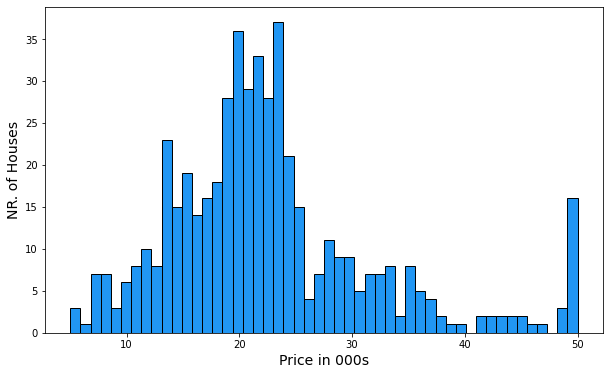

In [19]:
plt.figure(figsize=(10,6))
plt.hist(data['price'],bins=50,ec='black',color='#2196f3')
plt.xlabel('Price in 000s', fontsize=14)
plt.ylabel('NR. of Houses', fontsize=14)
plt.show()

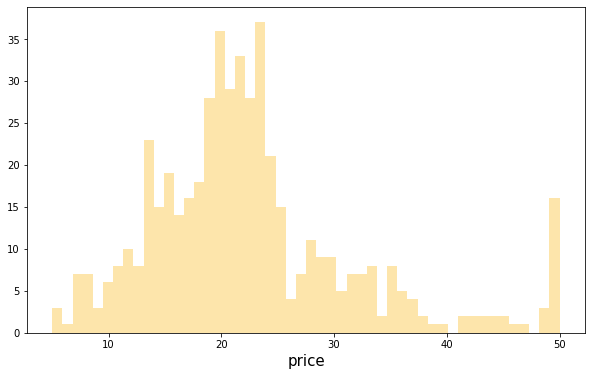

In [20]:
plt.figure(figsize=(10,6))
plt.xlabel('Price',fontsize=15)
sns.distplot(data['price'],bins=50,hist=True,kde=False,color='#fbc02d')
plt.show()

In [21]:
data.RM

0      6.575
1      6.421
2      7.185
3      6.998
4      7.147
       ...  
501    6.593
502    6.120
503    6.976
504    6.794
505    6.030
Name: RM, Length: 506, dtype: float64

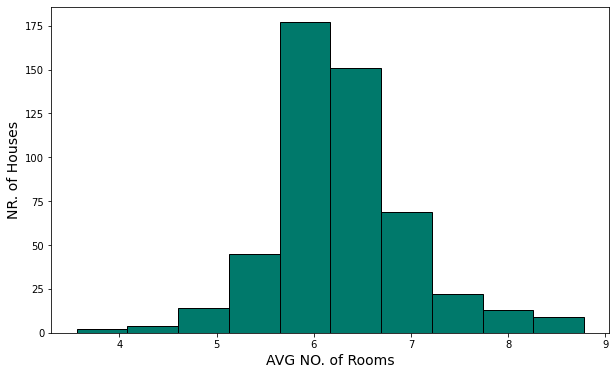

In [22]:
plt.figure(figsize=(10,6))
plt.hist(data['RM'],ec='black',color='#00796B')
plt.xlabel('AVG NO. of Rooms', fontsize=14)
plt.ylabel('NR. of Houses', fontsize=14)
plt.show()

In [23]:
data['RM'].mean()

6.284634387351787

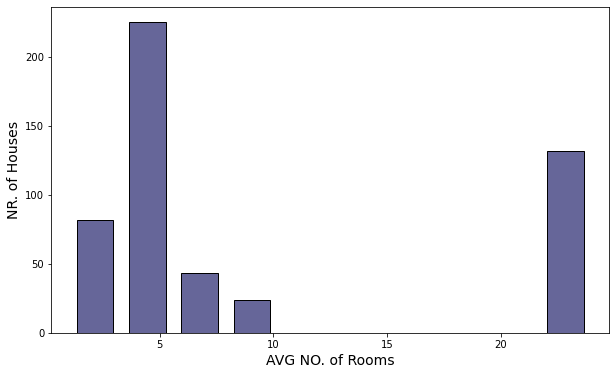

In [24]:
plt.figure(figsize=(10,6))
plt.hist(data['RAD'],ec='black',rwidth=0.7,color='#666699')
plt.xlabel('AVG NO. of Rooms', fontsize=14)
plt.ylabel('NR. of Houses', fontsize=14)
plt.show()

In [25]:
data['RAD'].value_counts()

24.0    132
5.0     115
4.0     110
3.0      38
6.0      26
8.0      24
2.0      24
1.0      20
7.0      17
Name: RAD, dtype: int64

In [26]:
frequency = data['RAD'].value_counts()

In [27]:
# type(frequency)
# frequency.index
frequency.axes[0]

Float64Index([24.0, 5.0, 4.0, 3.0, 6.0, 8.0, 2.0, 1.0, 7.0], dtype='float64')

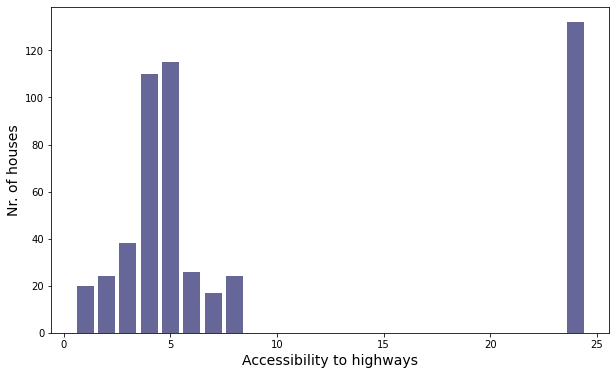

In [28]:
plt.figure(figsize=(10,6))
plt.bar(frequency.index,height=frequency,color='#666699')
plt.ylabel('Nr. of houses', fontsize=14)
plt.xlabel('Accessibility to highways', fontsize=14)
plt.show()

In [29]:
data['CHAS'].value_counts()

0.0    471
1.0     35
Name: CHAS, dtype: int64

In [30]:
data.describe()

CRIM          ZN       INDUS        CHAS         NOX          RM  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.069170    0.554695    6.284634   
std      8.601545   23.322453    6.860353    0.253994    0.115878    0.702617   
min      0.006320    0.000000    0.460000    0.000000    0.385000    3.561000   
25%      0.082045    0.000000    5.190000    0.000000    0.449000    5.885500   
50%      0.256510    0.000000    9.690000    0.000000    0.538000    6.208500   
75%      3.677083   12.500000   18.100000    0.000000    0.624000    6.623500   
max     88.976200  100.000000   27.740000    1.000000    0.871000    8.780000   

              AGE         DIS         RAD         TAX     PTRATIO           B  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean    68.574901    3.795043    9.549407  408.237154   18.455534  356.674032   
std     28.148861    2.105710    8.707259  168.537116    2.164946   91.294864   
min      2.900000    1.129600    1.000000  187.000000   12.600000    0.320000   
25%     45.025000    2.100175    4.000000  279.000000   17.400000  375.377500   
50%     77.500000    3.207450    5.000000  330.000000   19.050000  391.440000   
75%     94.075000    5.188425   24.000000  666.000000   20.200000  396.225000   
max    100.000000   12.126500   24.000000  711.000000   22.000000  396.900000   

            LSTAT       price  
count  506.000000  506.000000  
mean    12.653063   22.532806  
std      7.141062    9.197104  
min      1.730000    5.000000  
25%      6.950000   17.025000  
50%     11.360000   21.200000  
75%     16.955000   25.000000  
max     37.970000   50.000000

## Correlation
## $$ \rho _{xy} = corr(x,y)  $$
## $$ -1.0 \leq \rho _{xy} \leq + 1.0 $$

In [31]:
data['price'].corr(data['RM'])

0.695359947071539

In [32]:
data['price'].corr(data['PTRATIO'])

-0.5077866855375615

In [33]:
data.corr()

CRIM        ZN     INDUS      CHAS       NOX        RM       AGE  \
CRIM     1.000000 -0.200469  0.406583 -0.055892  0.420972 -0.219247  0.352734   
ZN      -0.200469  1.000000 -0.533828 -0.042697 -0.516604  0.311991 -0.569537   
INDUS    0.406583 -0.533828  1.000000  0.062938  0.763651 -0.391676  0.644779   
CHAS    -0.055892 -0.042697  0.062938  1.000000  0.091203  0.091251  0.086518   
NOX      0.420972 -0.516604  0.763651  0.091203  1.000000 -0.302188  0.731470   
RM      -0.219247  0.311991 -0.391676  0.091251 -0.302188  1.000000 -0.240265   
AGE      0.352734 -0.569537  0.644779  0.086518  0.731470 -0.240265  1.000000   
DIS     -0.379670  0.664408 -0.708027 -0.099176 -0.769230  0.205246 -0.747881   
RAD      0.625505 -0.311948  0.595129 -0.007368  0.611441 -0.209847  0.456022   
TAX      0.582764 -0.314563  0.720760 -0.035587  0.668023 -0.292048  0.506456   
PTRATIO  0.289946 -0.391679  0.383248 -0.121515  0.188933 -0.355501  0.261515   
B       -0.385064  0.175520 -0.356977  0.048788 -0.380051  0.128069 -0.273534   
LSTAT    0.455621 -0.412995  0.603800 -0.053929  0.590879 -0.613808  0.602339   
price   -0.388305  0.360445 -0.483725  0.175260 -0.427321  0.695360 -0.376955   

              DIS       RAD       TAX   PTRATIO         B     LSTAT     price  
CRIM    -0.379670  0.625505  0.582764  0.289946 -0.385064  0.455621 -0.388305  
ZN       0.664408 -0.311948 -0.314563 -0.391679  0.175520 -0.412995  0.360445  
INDUS   -0.708027  0.595129  0.720760  0.383248 -0.356977  0.603800 -0.483725  
CHAS    -0.099176 -0.007368 -0.035587 -0.121515  0.048788 -0.053929  0.175260  
NOX     -0.769230  0.611441  0.668023  0.188933 -0.380051  0.590879 -0.427321  
RM       0.205246 -0.209847 -0.292048 -0.355501  0.128069 -0.613808  0.695360  
AGE     -0.747881  0.456022  0.506456  0.261515 -0.273534  0.602339 -0.376955  
DIS      1.000000 -0.494588 -0.534432 -0.232471  0.291512 -0.496996  0.249929  
RAD     -0.494588  1.000000  0.910228  0.464741 -0.444413  0.488676 -0.381626  
TAX     -0.534432  0.910228  1.000000  0.460853 -0.441808  0.543993 -0.468536  
PTRATIO -0.232471  0.464741  0.460853  1.000000 -0.177383  0.374044 -0.507787  
B        0.291512 -0.444413 -0.441808 -0.177383  1.000000 -0.366087  0.333461  
LSTAT   -0.496996  0.488676  0.543993  0.374044 -0.366087  1.000000 -0.737663  
price    0.249929 -0.381626 -0.468536 -0.507787  0.333461 -0.737663  1.000000

In [34]:
mask = np.zeros_like(data.corr())
triangle_indices = np.triu_indices_from(mask) #This helps to filter the data 
mask[triangle_indices] = True # true is 1 
mask

array([[1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1.]])

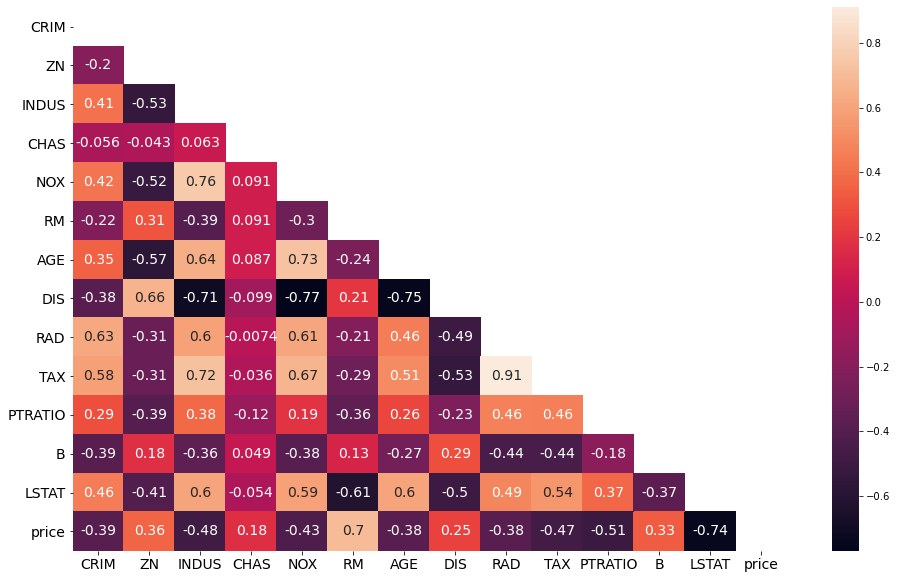

In [35]:
plt.figure(figsize = (16,10))
sns.heatmap(data.corr(),mask=mask,annot=True,annot_kws={"size" : 14})
# sns.set_style('white')
plt.xticks(fontsize=14)
plt.yticks(fontsize=14)
plt.show()

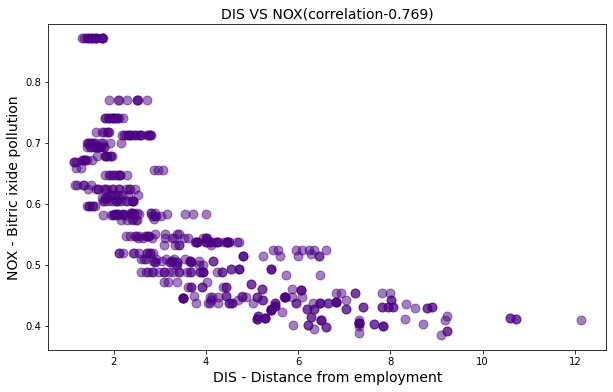

In [36]:
#challenge : Picture the relationship between pollution and dance in your head
# then create a scatter plot between DIS and NOX    
nox_dis_corr = round(data['NOX'].corr(data['DIS']),3)
plt.figure(figsize=(10,6))
plt.scatter(x=data['DIS'],y=data['NOX'],alpha=0.5,s=80,color='indigo')
plt.title(f'DIS VS NOX(correlation{nox_dis_corr})',fontsize=14)
plt.xlabel('DIS - Distance from employment',fontsize=14)
plt.ylabel('NOX - Bitric ixide pollution',fontsize=14)
plt.show()

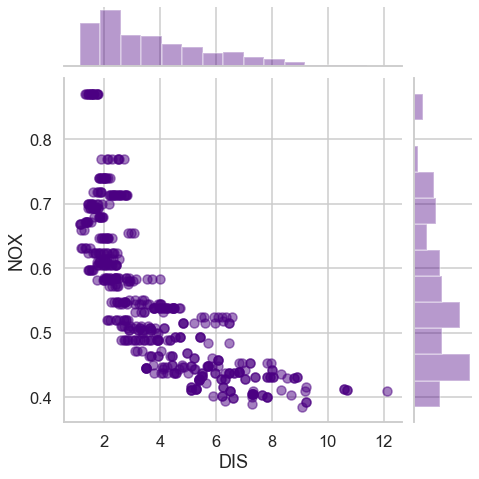

In [37]:
sns.set()
sns.set_style('whitegrid')
sns.set_context('talk')
sns.jointplot(x=data['DIS'],y=data['NOX'],height=7,color='indigo',joint_kws={'alpha':0.5})
sns.set()

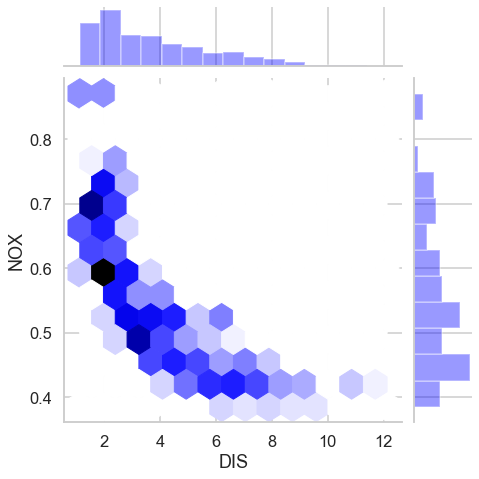

In [38]:
sns.set()
sns.set_style('whitegrid')
sns.set_context('talk')
sns.jointplot(x=data['DIS'],y=data['NOX'],height=7,color='blue',kind='hex')
sns.set()

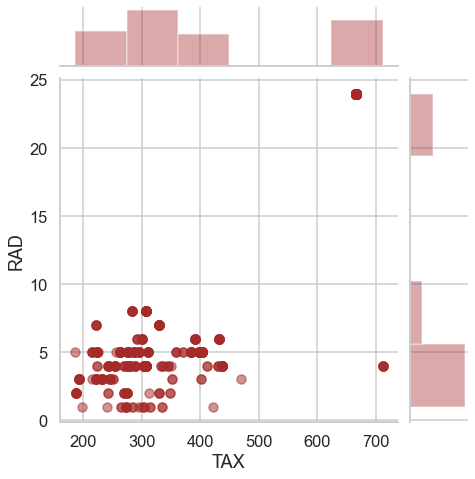

In [39]:
sns.set()
sns.set_style('whitegrid')
sns.set_context('talk')
sns.jointplot(x=data['TAX'],y=data['RAD'],height=7,color='brown',joint_kws={'alpha':0.5})
sns.set()

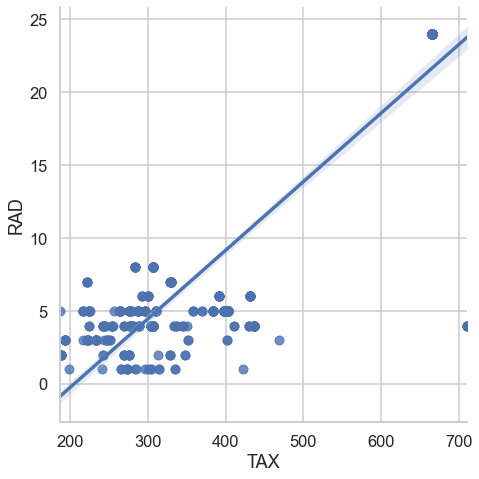

In [40]:
sns.set()
sns.set_style('whitegrid')
sns.set_context('talk')
sns.lmplot(x='TAX',y='RAD',data=data,height=7)
plt.show()

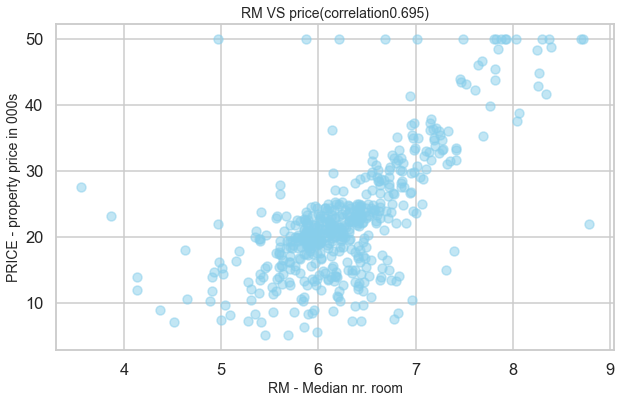

In [41]:
#challenge: Create a scatter plot between the house prices and the numbers of rooms (RM)

RM_tgt_corr = round(data['RM'].corr(data['price']),3)
plt.figure(figsize=(10,6))
plt.scatter(x=data['RM'],y=data['price'],alpha=0.5,s=80,color='skyblue')
plt.title(f'RM VS price(correlation{RM_tgt_corr})',fontsize=14)
plt.xlabel('RM - Median nr. room',fontsize=14)
plt.ylabel('PRICE - property price in 000s',fontsize=14)
plt.show()

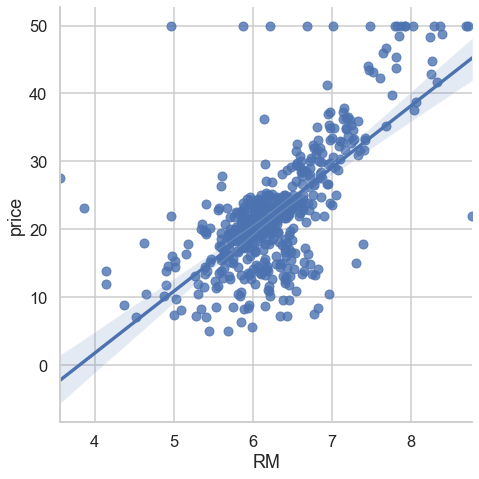

In [42]:
sns.lmplot(x='RM', y='price',data=data,height=7)


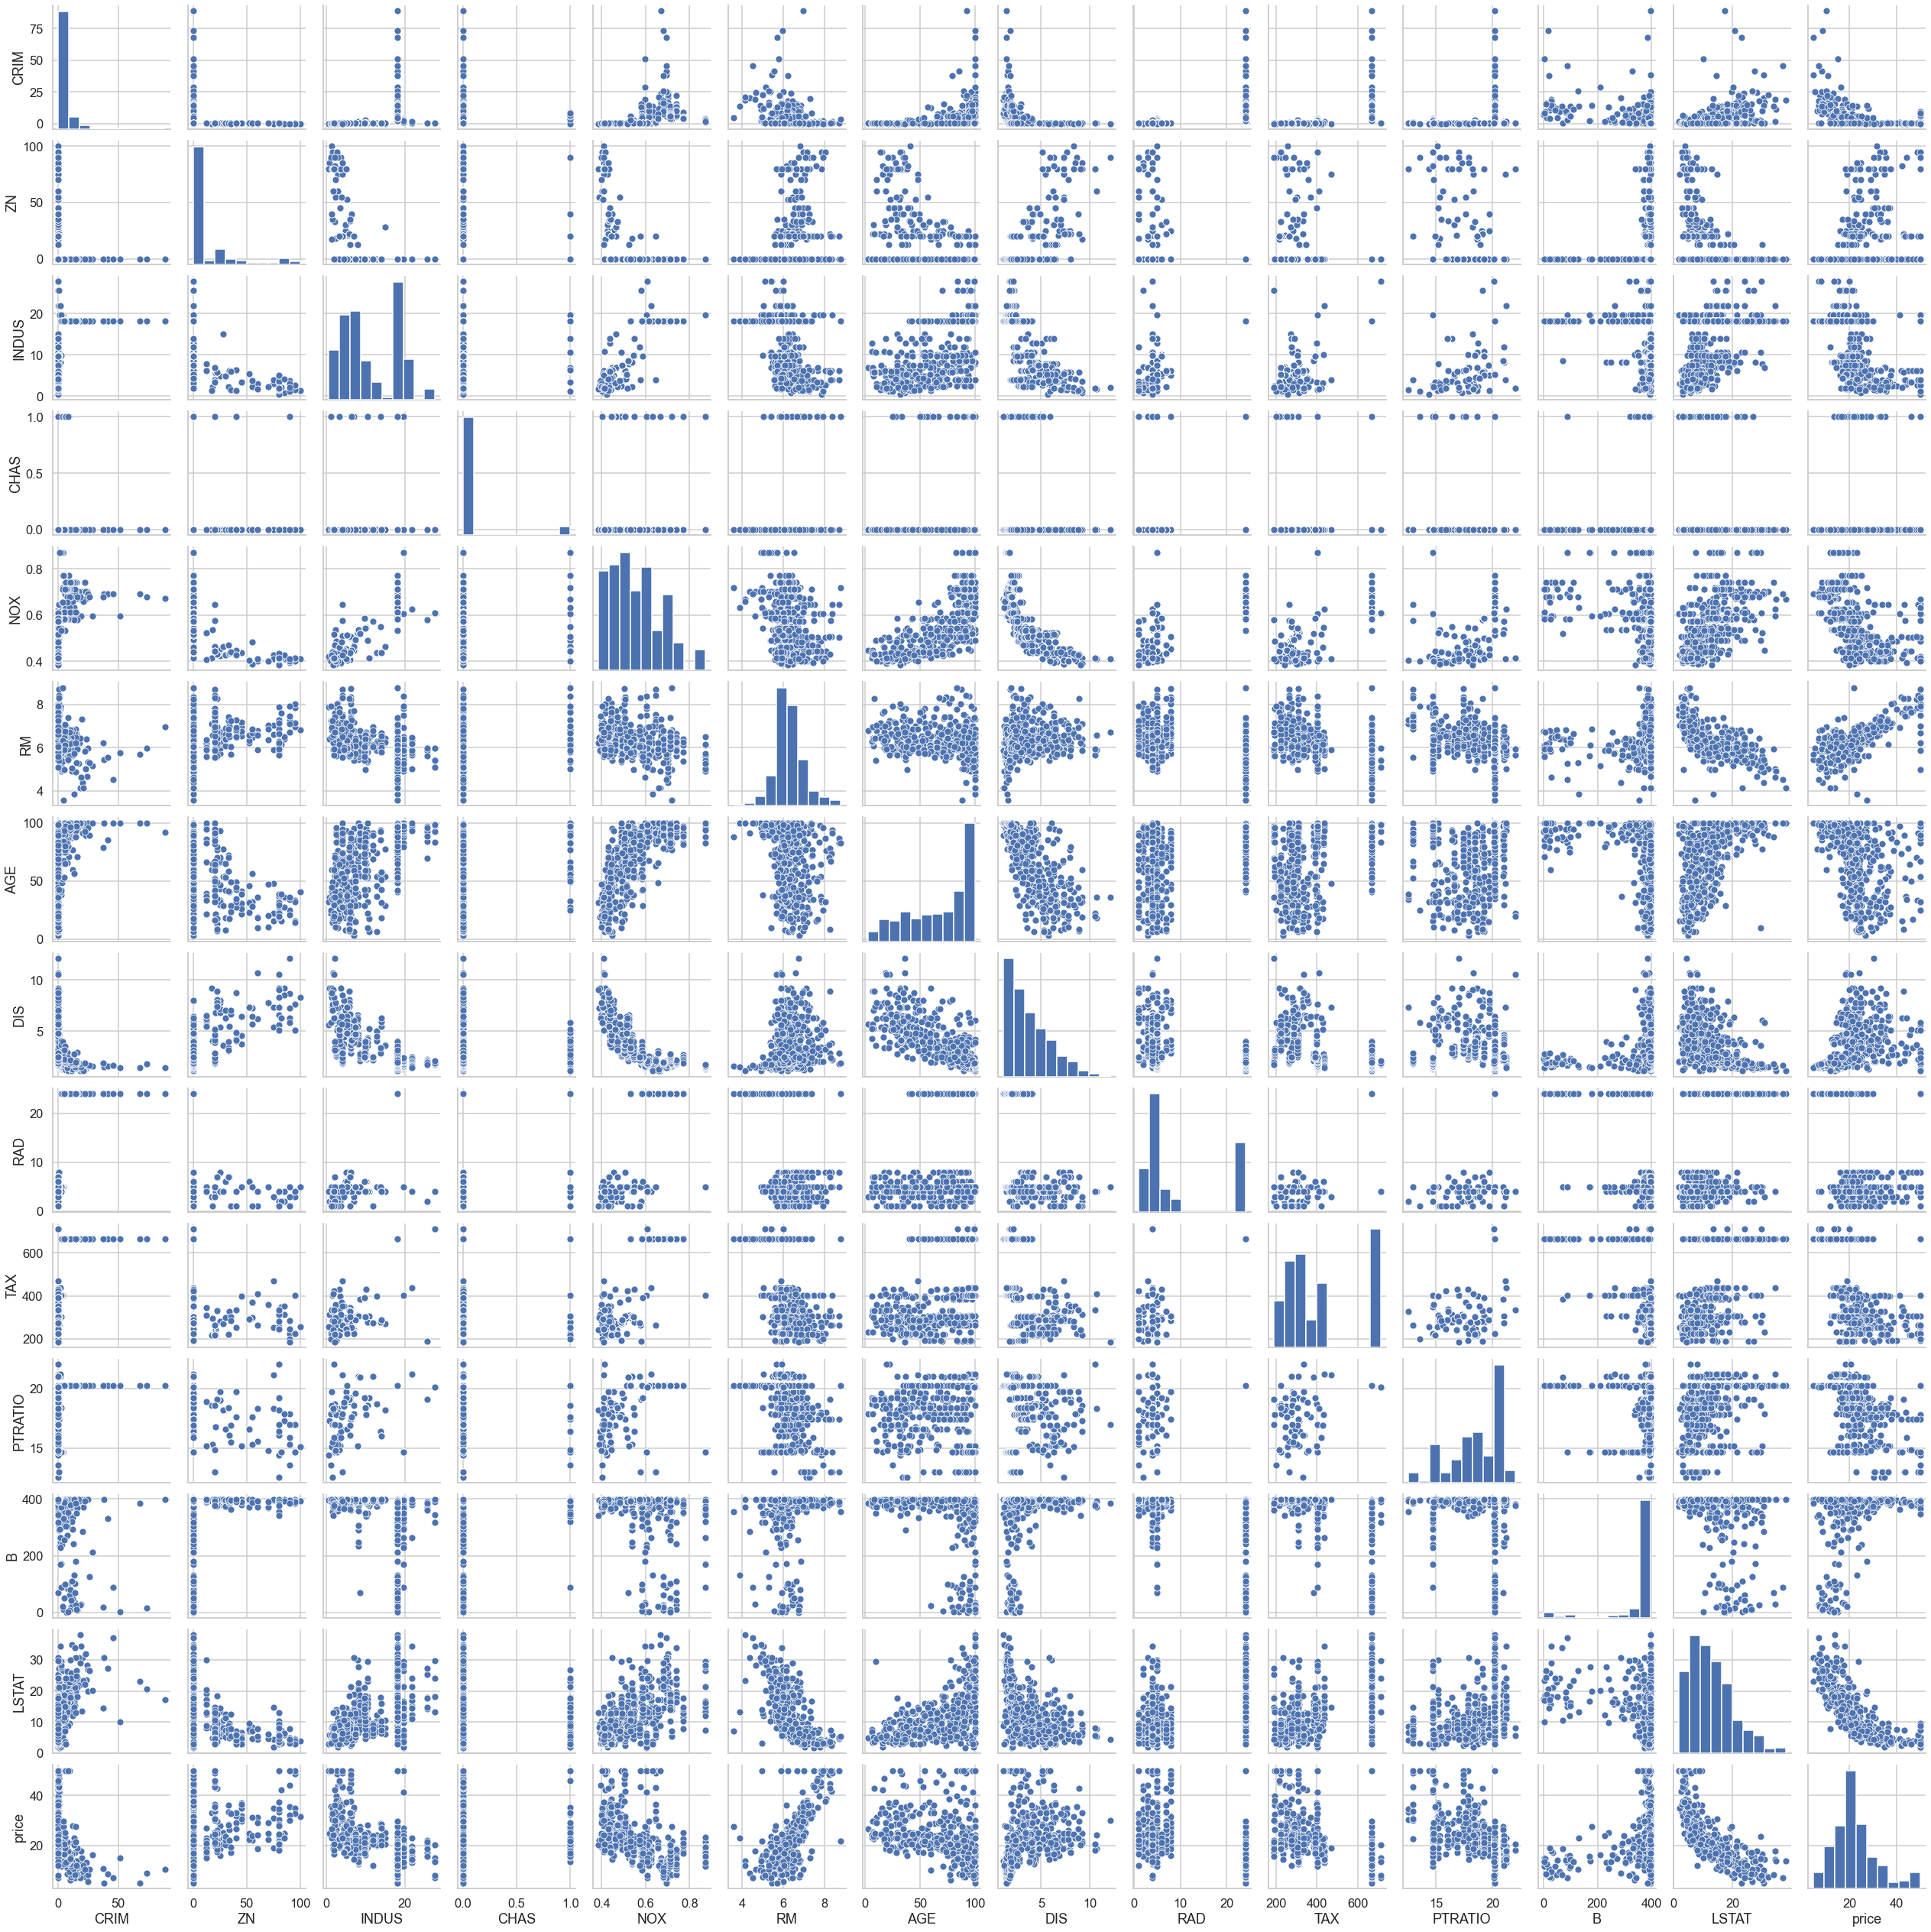

Wall time: 1min 9s


In [43]:
%%time
sns.pairplot(data)
plt.show()

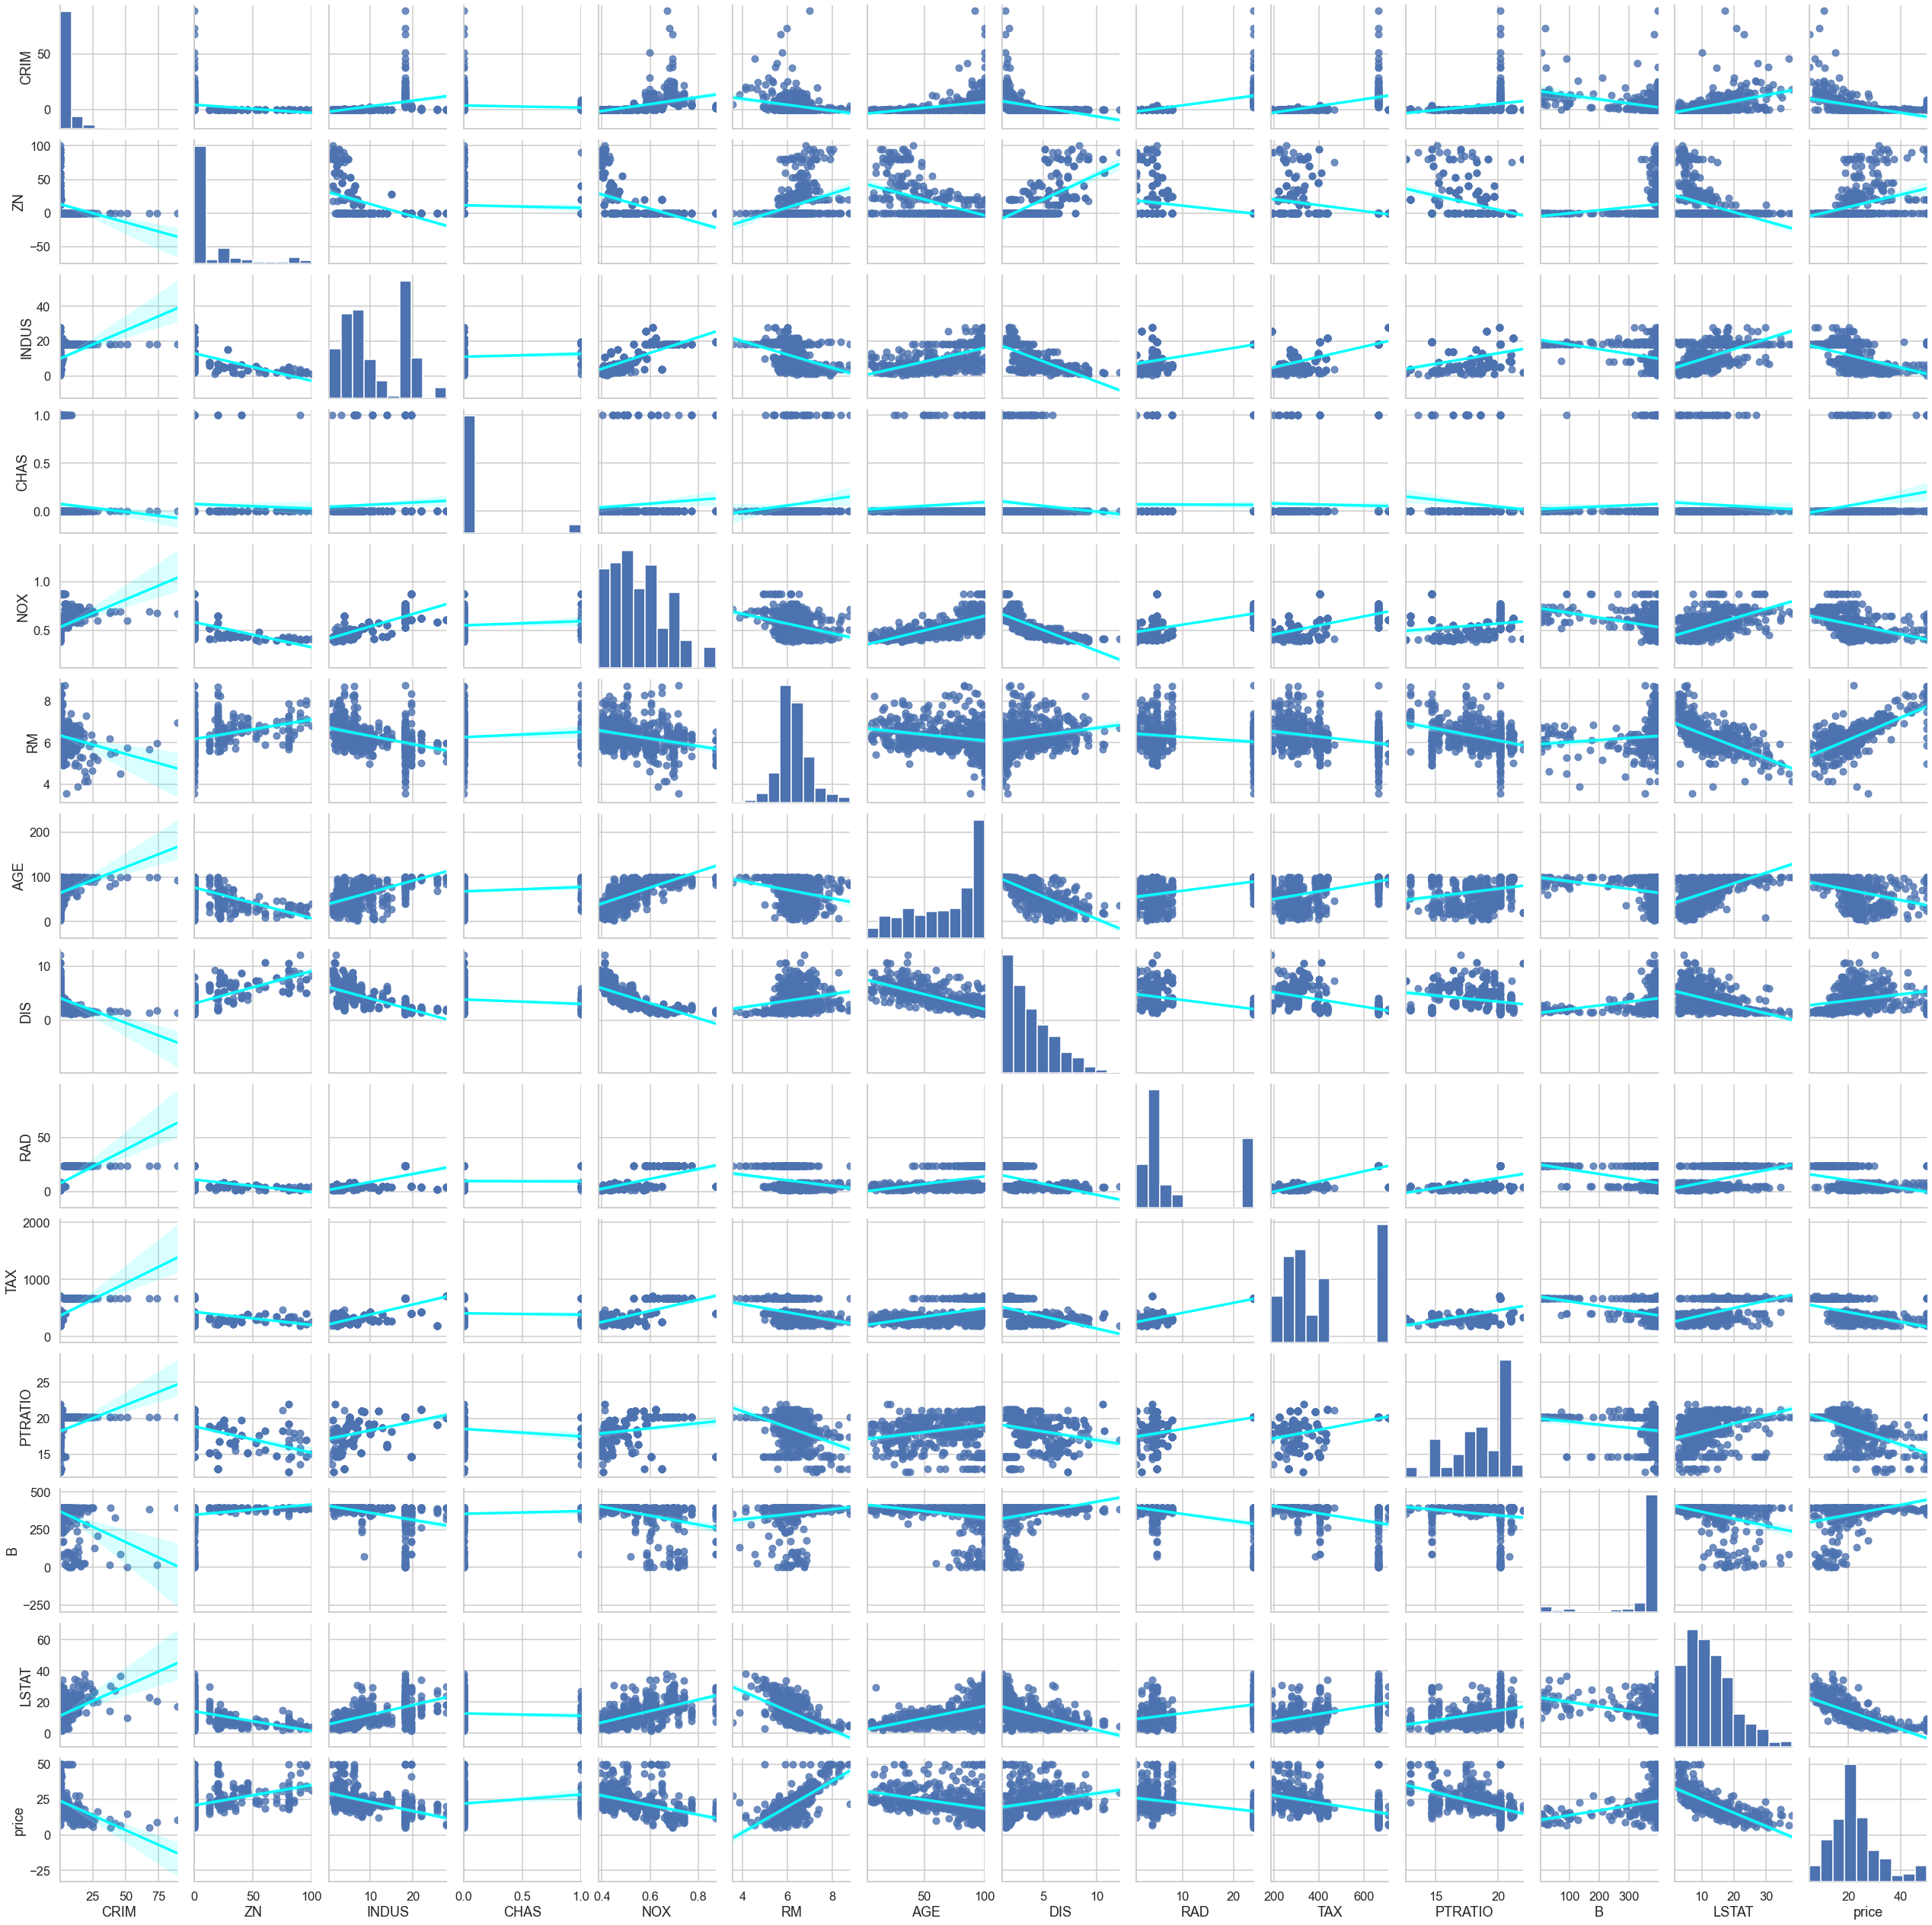

Wall time: 1min 42s


In [44]:
%%time
sns.pairplot(data,kind='reg',plot_kws={'line_kws':{'color':'cyan'}})
plt.show()

## Traning and test dataset split

In [45]:
prices = data['price']
features = data.drop('price',axis=1)
x_train, x_test, y_train, y_test = train_test_split(features,prices,test_size = 0.2,random_state=10)

In [46]:
# % of training set
len(x_train) / len(features)

0.7984189723320159

In [47]:
# % of test data set
x_test.shape[0] / features.shape[0]

0.2015810276679842

## Multi-Linear Regression

In [48]:
regr = LinearRegression()
regr.fit(x_train,y_train)

#challenge : print out r-squared for training and test datasets

print('Traning data r-square : ', regr.score(x_train,y_train))
print('Test data r-square : ', regr.score(x_test,y_test))


print('intercept',regr.intercept_)
pd.DataFrame(data=regr.coef_,index=x_train.columns,columns=['coef'])
      

Traning data r-square :  0.750121534530608
Test data r-square :  0.6709339839115628
intercept 36.53305138282439


coef
CRIM     -0.128181
ZN        0.063198
INDUS    -0.007576
CHAS      1.974515
NOX     -16.271989
RM        3.108456
AGE       0.016292
DIS      -1.483014
RAD       0.303988
TAX      -0.012082
PTRATIO  -0.820306
B         0.011419
LSTAT    -0.581626

## Data Transformations

In [49]:
data['price'].skew()
y_log = np.log(data['price'])


In [50]:
y_log.head()

0    3.178054
1    3.072693
2    3.546740
3    3.508556
4    3.589059
Name: price, dtype: float64

In [51]:
y_log.tail()

501    3.109061
502    3.025291
503    3.173878
504    3.091042
505    2.476538
Name: price, dtype: float64

In [52]:
y_log.skew()

-0.33032129530987864

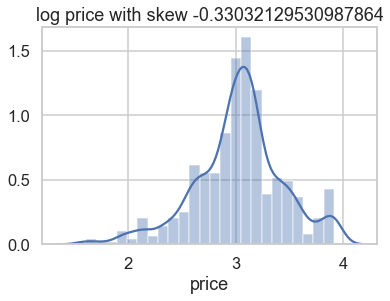

In [53]:
sns.distplot(y_log)
plt.title(f"log price with skew {y_log.skew()}")
plt.show()

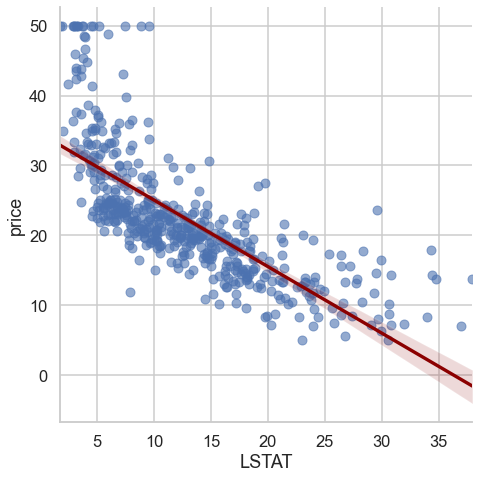

In [54]:
sns.lmplot(x = 'LSTAT', y = 'price', data = data, height = 7, scatter_kws = { 'alpha' : 0.6 }, 
             line_kws = {'color': 'darkred'})
plt.show()

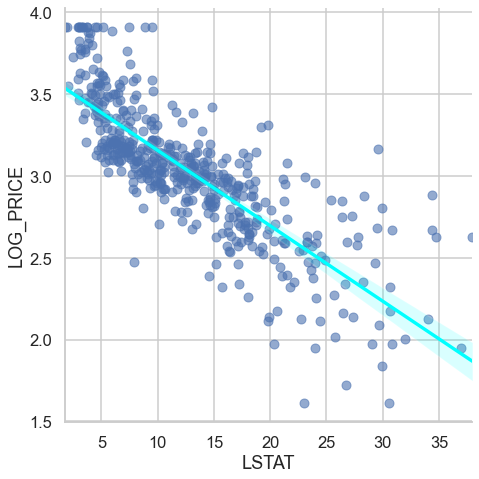

In [55]:
transformed_data = features
transformed_data [ 'LOG_PRICE' ] = y_log

sns.lmplot(x = 'LSTAT', y = 'LOG_PRICE', data = transformed_data, height = 7, scatter_kws = { 'alpha' : 0.6 }, 
             line_kws = {'color': 'cyan'})
plt.show()

## Regression using log prices

In [56]:
prices = np.log(data['price']) # use log price
features = data.drop('price',axis=1)
x_train, x_test, y_train, y_test = train_test_split(features,prices,test_size = 0.2,random_state=10)

regr = LinearRegression()
regr.fit(x_train,y_train)

print('Traning data r-square : ', regr.score(x_train,y_train))
print('Test data r-square : ', regr.score(x_test,y_test))


print('intercept',regr.intercept_)
pd.DataFrame(data=regr.coef_,index=x_train.columns,columns=['coef'])
      

Traning data r-square :  0.7930234826697583
Test data r-square :  0.7446922306260724
intercept 4.05994387177519


coef
CRIM    -0.010672
ZN       0.001579
INDUS    0.002030
CHAS     0.080331
NOX     -0.704068
RM       0.073404
AGE      0.000763
DIS     -0.047633
RAD      0.014565
TAX     -0.000645
PTRATIO -0.034795
B        0.000516
LSTAT   -0.031390

In [57]:
# Charles River property premium
np.e** 0.080475

1.0838017512597784

## P Values and evaluating coefficients

In [58]:
x_incl_const = sm.add_constant(x_train)

model = sm.OLS(y_train,x_incl_const)
result = model.fit()

# result.params
# result.pvalues

pd.DataFrame({'coef' : result.params,'p-values':round(result.pvalues,3)})

coef  p-values
const    4.059944     0.000
CRIM    -0.010672     0.000
ZN       0.001579     0.009
INDUS    0.002030     0.445
CHAS     0.080331     0.038
NOX     -0.704068     0.000
RM       0.073404     0.000
AGE      0.000763     0.209
DIS     -0.047633     0.000
RAD      0.014565     0.000
TAX     -0.000645     0.000
PTRATIO -0.034795     0.000
B        0.000516     0.000
LSTAT   -0.031390     0.000

## Testing for Multicollinearity
$$  tax = \alpha_o +  \alpha _1 RMT \alpha _2NOX + ... + \alpha _{12} LSTAT $$

$$ VIF _{TAX} = \frac{1}\ {(1-R _{TAX}^2)} $$

In [59]:
variance_inflation_factor(exog = x_incl_const.values, exog_idx=1)

1.7145250443932485

In [60]:
#Challenge - print out the number of columns in x_incl_const
len(x_incl_const.columns)
x_incl_const.shape[1]

14

In [61]:
# challenge - write a for loop that prints out all the VIFs for all the features

for i in range(x_incl_const.shape[1]):
    print(variance_inflation_factor(exog=x_incl_const.values,exog_idx=i))
print('ALL DONE!')

597.5487126763895
1.7145250443932485
2.3328224265597584
3.943448822674636
1.0788133385000578
4.410320817897635
1.8404053075678568
3.3267660823099408
4.222923410477865
7.314299817005058
8.508856493040817
1.839911632651406
1.3386713255364715
2.812544292793034
ALL DONE!


In [62]:
vif = []
for i in range(x_incl_const.shape[1]):
    vif.append(variance_inflation_factor(exog=x_incl_const.values,exog_idx=i))
print(vif)
    

[597.5487126763895, 1.7145250443932485, 2.3328224265597584, 3.943448822674636, 1.0788133385000578, 4.410320817897635, 1.8404053075678568, 3.3267660823099408, 4.222923410477865, 7.314299817005058, 8.508856493040817, 1.839911632651406, 1.3386713255364715, 2.812544292793034]


In [63]:
vif = [variance_inflation_factor(exog=x_incl_const.values,exog_idx=i)for i in range(x_incl_const.shape[1])]

pd.DataFrame({'coef_name' : x_incl_const.columns,'vif':vif})
   

coef_name         vif
0      const  597.548713
1       CRIM    1.714525
2         ZN    2.332822
3      INDUS    3.943449
4       CHAS    1.078813
5        NOX    4.410321
6         RM    1.840405
7        AGE    3.326766
8        DIS    4.222923
9        RAD    7.314300
10       TAX    8.508856
11   PTRATIO    1.839912
12         B    1.338671
13     LSTAT    2.812544

In [64]:
vif = [variance_inflation_factor(exog=x_incl_const.values,exog_idx=i)for i in range(x_incl_const.shape[1])]

pd.DataFrame({'coef_name' : x_incl_const.columns,'vif':np.around(vif,2)})
   

coef_name     vif
0      const  597.55
1       CRIM    1.71
2         ZN    2.33
3      INDUS    3.94
4       CHAS    1.08
5        NOX    4.41
6         RM    1.84
7        AGE    3.33
8        DIS    4.22
9        RAD    7.31
10       TAX    8.51
11   PTRATIO    1.84
12         B    1.34
13     LSTAT    2.81

## Model Simplification and the BIC

In [65]:
# origin model with log prices and all features
x_incl_const = sm.add_constant(x_train)
model = sm.OLS(y_train,x_incl_const)
result = model.fit()
org_coef = pd.DataFrame({'coef' : result.params,'p-values':round(result.pvalues,3)})

#challenge - find and check official docs for results object and print out BIC and r-squared

print('BIC is',result.bic)
print('r-squared is',result.rsquared)

BIC is -139.74997769478875
r-squared is 0.7930234826697582


In [66]:
# Reduce model # 1 excluding INDUS

x_incl_const = sm.add_constant(x_train)
x_incl_const = x_incl_const.drop(['INDUS'],axis=1)

model = sm.OLS(y_train,x_incl_const)
result = model.fit()

coef_minus_indus = pd.DataFrame({'coef' : result.params,'p-values':round(result.pvalues,3)})

print('BIC is',result.bic)
print('r-squared is',result.rsquared)

BIC is -145.14508855591163
r-squared is 0.7927126289415163


In [67]:
# Reduce model # 2 excluding INDUS and AGE

x_incl_const = sm.add_constant(x_train)
x_incl_const = x_incl_const.drop(['INDUS','AGE'],axis=1)

model = sm.OLS(y_train,x_incl_const)
result = model.fit()

reduced_coef = pd.DataFrame({'coef' : result.params,'p-values':round(result.pvalues,3)})

print('BIC is',result.bic)
print('r-squared is',result.rsquared)

BIC is -149.49934294224656
r-squared is 0.7918657661852815


In [68]:
frames = [org_coef,coef_minus_indus, reduced_coef]
pd.concat(frames,axis=1)

coef  p-values      coef  p-values      coef  p-values
const    4.059944     0.000  4.056231     0.000  4.035922     0.000
CRIM    -0.010672     0.000 -0.010721     0.000 -0.010702     0.000
ZN       0.001579     0.009  0.001551     0.010  0.001461     0.014
INDUS    0.002030     0.445       NaN       NaN       NaN       NaN
CHAS     0.080331     0.038  0.082795     0.032  0.086449     0.025
NOX     -0.704068     0.000 -0.673365     0.000 -0.616448     0.000
RM       0.073404     0.000  0.071739     0.000  0.076133     0.000
AGE      0.000763     0.209  0.000766     0.207       NaN       NaN
DIS     -0.047633     0.000 -0.049394     0.000 -0.052692     0.000
RAD      0.014565     0.000  0.014014     0.000  0.013743     0.000
TAX     -0.000645     0.000 -0.000596     0.000 -0.000590     0.000
PTRATIO -0.034795     0.000 -0.034126     0.000 -0.033481     0.000
B        0.000516     0.000  0.000511     0.000  0.000518     0.000
LSTAT   -0.031390     0.000 -0.031262     0.000 -0.030271     0.000

## Residuals and Residual Plots

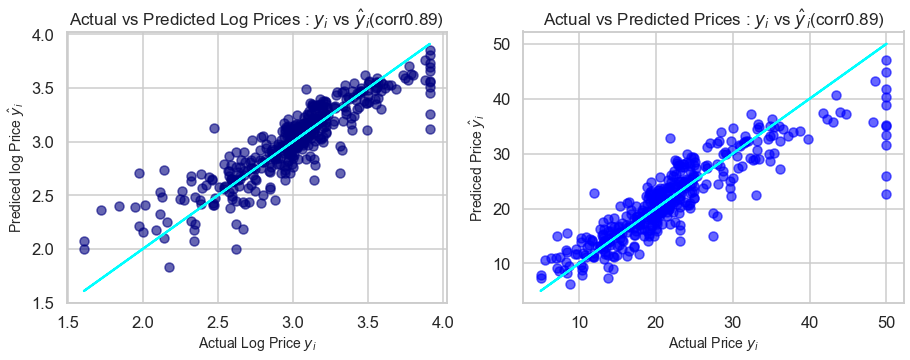

In [69]:
# Modified model : Transformed (using log prices) and simplified(dropping two features)
prices = np.log(data['price']) # use log price
features = data.drop(['price','INDUS','AGE'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(features,prices,test_size = 0.2,random_state=10)

# Using Statsmodel
x_incl_const = sm.add_constant(x_train)
model = sm.OLS(y_train,x_incl_const)
result = model.fit()

# Residuals
# residuals = y_train - result.fittedvalues
# residuals.describe()
# result.resid

#Graph of Actual vs Predicted prices
corr = round(y_train.corr(result.fittedvalues),2)
plt.figure(figsize=[15,5])

plt.subplot(1,2,1)
plt.xlabel('Actual Log Price $ y _i $',fontsize=14)
plt.ylabel('Prediced log Price $ \hat y _i $',fontsize=14)
plt.title(f'Actual vs Predicted Log Prices : $ y _i $ vs $\hat y _i$(corr{corr})',fontsize=17)
plt.scatter(x = y_train, y = result.fittedvalues,c='navy',alpha=0.6)
plt.plot(y_train,y_train,color='cyan')

plt.subplot(1,2,2)
plt.xlabel('Actual Price $ y _i $',fontsize=14)
plt.ylabel('Prediced Price $ \hat y _i $',fontsize=14)
plt.title(f'Actual vs Predicted Prices : $ y _i $ vs $\hat y _i$(corr{corr})',fontsize=17)
plt.scatter(x = np.e**y_train, y = np.e**result.fittedvalues,c='blue',alpha=0.6)
plt.plot(np.e**y_train,np.e**y_train,color='cyan')
plt.show()

reduced_log_mse = round(result.mse_resid,3)
reduced_log_rsquared = round(result.rsquared,3)

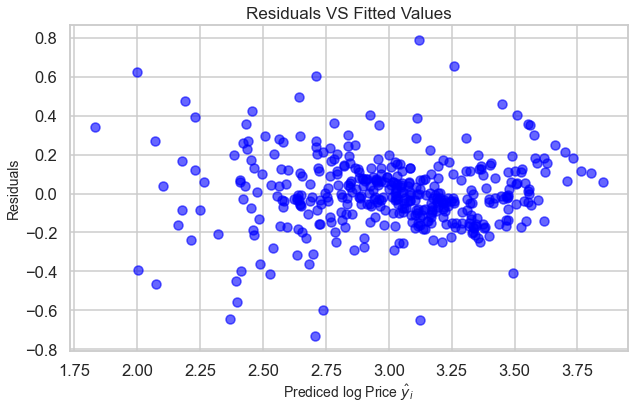

In [70]:
# Resudual vs predicted values
plt.figure(figsize=[10,6])
plt.xlabel('Prediced log Price $\hat y _i $',fontsize=14)
plt.ylabel('Residuals',fontsize=14)
plt.title('Residuals VS Fitted Values',fontsize=17)
plt.scatter(x = result.fittedvalues, y = result.resid,c='blue',alpha=0.6)
# plt.plot(np.e**y_train,np.e**y_train,color='cyan')
plt.show()

reduced_log_mse = round(result.mse_resid,3)
reduced_log_rsquared = round(result.rsquared,3)

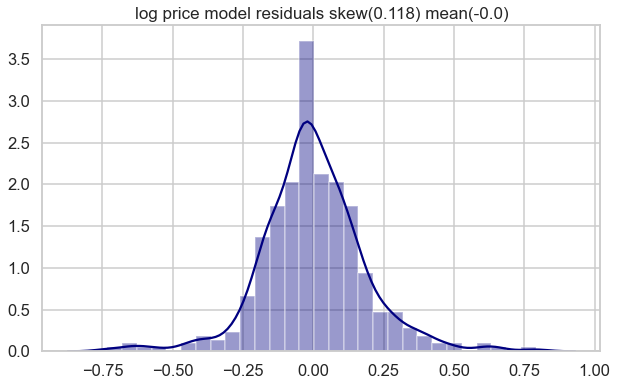

In [71]:
# Distribution of Redesiduals (log prices) - checking for norality
resid_mean =round(result.resid.mean(),3)
resid_skew = round(result.resid.skew(),3)
# resid_mean
# resid_skew
plt.figure(figsize = [10,6])
sns.distplot(result.resid,color='navy')
plt.title(f'log price model residuals skew({resid_skew}) mean({resid_mean})',fontsize=17)
plt.show()


reduced_log_mse = round(result.mse_resid,3)
reduced_log_rsquared = round(result.rsquared,3)

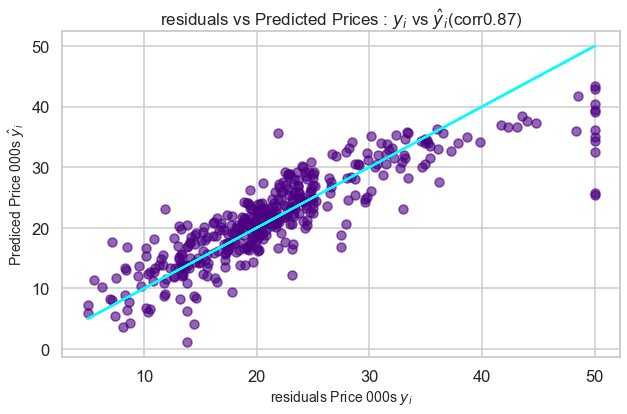

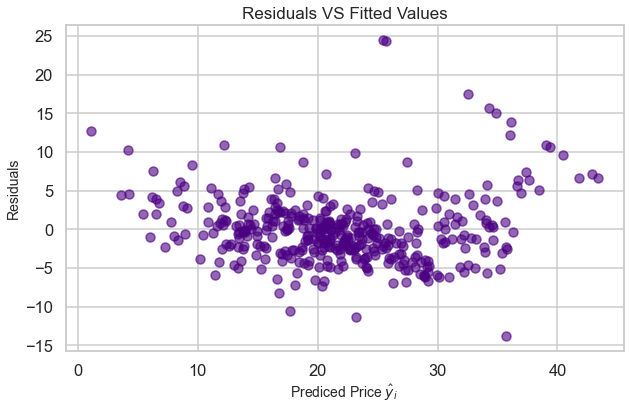

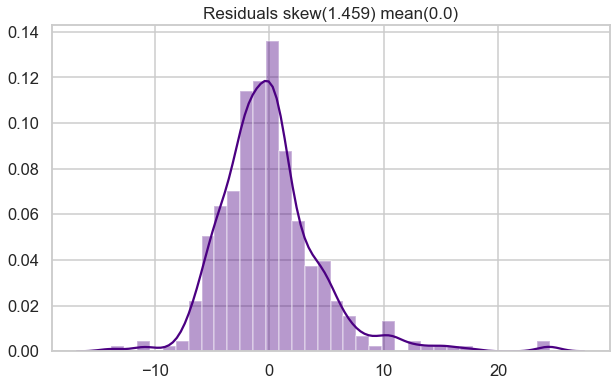

In [72]:
#challenge : Using the original model with all the features and normal prices generate : 
#plot of actual vs predicted prices (INCL.correlation)
#Plot of residuals vs predicted prices 
#plot of distribution of residuals(INCL.skew)
#Analyse the results 

# original model : normal prices and all features 
prices = data['price'] # use log price
features = data.drop(['price'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(features,prices,test_size = 0.2,random_state=10)

# Using Statsmodel
x_incl_const = sm.add_constant(x_train)
model = sm.OLS(y_train,x_incl_const)
result = model.fit()

#Graph of residuals vs Predicted prices
corr = round(y_train.corr(result.fittedvalues),2)
plt.figure(figsize=[10,6])
plt.xlabel('residuals Price 000s $ y _i $',fontsize=14)
plt.ylabel('Prediced Price 000s $ \hat y _i $',fontsize=14)
plt.title(f'residuals vs Predicted Prices : $ y _i $ vs $\hat y _i$(corr{corr})',fontsize=17)
plt.scatter(x = y_train, y = result.fittedvalues,c='indigo',alpha=0.6)
plt.plot(y_train,y_train,color='cyan')
plt.show()

# Resudual vs predicted values
plt.figure(figsize=[10,6])
plt.xlabel('Prediced Price $\hat y _i $',fontsize=14)
plt.ylabel('Residuals',fontsize=14)
plt.title('Residuals VS Fitted Values',fontsize=17)
plt.scatter(x = result.fittedvalues, y = result.resid,c='indigo',alpha=0.6)
# plt.plot(np.e**y_train,np.e**y_train,color='cyan')
plt.show()

# Residuals distribution chart
resid_mean =round(result.resid.mean(),3)
resid_skew = round(result.resid.skew(),3)
plt.figure(figsize = [10,6])
sns.distplot(result.resid,color='indigo')
plt.title(f'Residuals skew({resid_skew}) mean({resid_mean})',fontsize=17)
plt.show()


full_normal_mse = round(result.mse_resid,3)
full_normal_rsquared = round(result.rsquared,3)

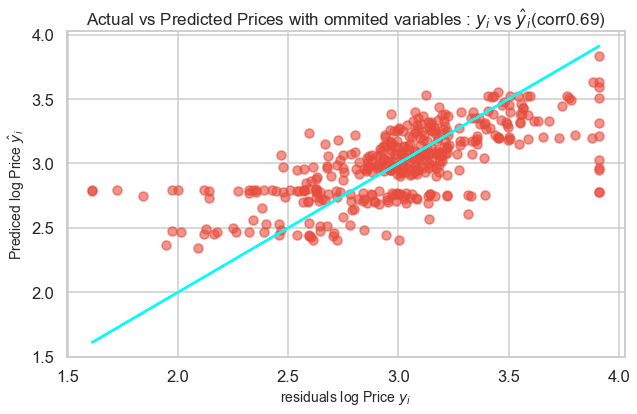

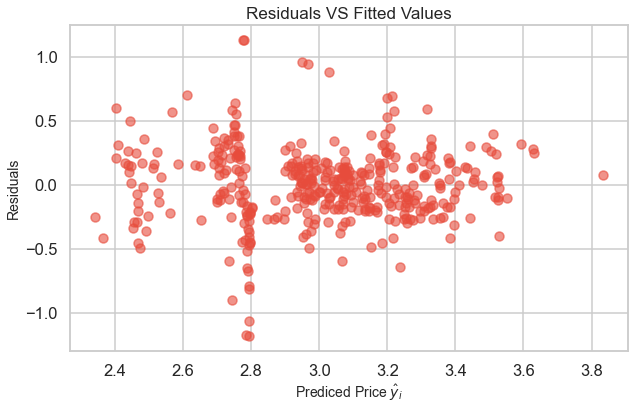

In [73]:
#model ommiting key features  using log prices 
prices = np.log(data['price']) # use log price
features = data.drop(['price','AGE','LSTAT','RM','NOX','CRIM'],axis=1)
x_train, x_test, y_train, y_test = train_test_split(features,prices,test_size = 0.2,random_state=10)

# Using Statsmodel
x_incl_const = sm.add_constant(x_train)
model = sm.OLS(y_train,x_incl_const)
result = model.fit()

#Graph of residuals vs Predicted prices
corr = round(y_train.corr(result.fittedvalues),2)
plt.figure(figsize=[10,6])
plt.xlabel('residuals log Price $ y _i $',fontsize=14)
plt.ylabel('Prediced log Price $ \hat y _i $',fontsize=14)
plt.title(f'Actual vs Predicted Prices with ommited variables : $ y _i $ vs $\hat y _i$(corr{corr})',fontsize=17)
plt.scatter(x = y_train, y = result.fittedvalues,c='#e74c3c',alpha=0.6)
plt.plot(y_train,y_train,color='cyan')
plt.show()

# Resudual vs predicted values
plt.figure(figsize=[10,6])
plt.xlabel('Prediced Price $\hat y _i $',fontsize=14)
plt.ylabel('Residuals',fontsize=14)
plt.title('Residuals VS Fitted Values',fontsize=17)
plt.scatter(x = result.fittedvalues, y = result.resid,c='#e74c3c',alpha=0.6)
plt.show()


ommitted_var_mse = round(result.mse_resid,3)
ommitted_var_rsquared = round(result.rsquared,3)

In [74]:
pd.DataFrame({'R-Squared' : [reduced_log_rsquared,full_normal_rsquared,ommitted_var_rsquared],
              'MSE' : [reduced_log_mse,full_normal_mse,ommitted_var_mse],
              'RMSE' : np.sqrt([reduced_log_mse,full_normal_mse,ommitted_var_mse])},
              index = ['Reduced Log Model','Full Normal Price Model','Ommitted Var Model'])

R-Squared     MSE      RMSE
Reduced Log Model            0.792   0.035  0.187083
Full Normal Price Model      0.750  19.921  4.463295
Ommitted Var Model           0.477   0.087  0.294958

In [75]:
# Challenge : OUT ESTIMATE FOR a house price is $30,000 calculate then upper and lower bound
# for a 55% prediction interval using the reduced log model 

print('1 S.D in log prices is', np.sqrt(reduced_log_mse))
print('2 S.D in log prices is', 2 * np.sqrt(reduced_log_mse))

upper_bound = np.log(30) + 2 * np.sqrt(reduced_log_mse)
print('THe upper bound for a 95% prediction interval is : ', upper_bound)
print('THe upper bound in normal price is  : ', np.e**upper_bound*1000)

lower_bound = np.log(30) - 2 * np.sqrt(reduced_log_mse)
print('THe lower bound in price for a 55% prediction interval is : ', lower_bound)
print('THe lower bound in normal price is $  : ', np.e**lower_bound*1000)

1 S.D in log prices is 0.18708286933869708
2 S.D in log prices is 0.37416573867739417
THe upper bound for a 95% prediction interval is :  3.7753631203395495
THe upper bound in normal price is  :  43613.34233239937
THe lower bound in price for a 55% prediction interval is :  3.0270316429847615
THe lower bound in normal price is $  :  20635.886906824155
